# Проект о вкусной и здоровой пище

Суть проекта - при помощи Feature Engineering улучшить показатели модели ML, созданной в базовом драфте.  Вторая задача проекта - познакомиться с платформой Kaggle и механикой соревнований на ней. 

Начало ноутбука повторяет шаблон, поэтому не содержит авторских комментариев (начинаются с раздела "Подготовка данных").


# import

In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns 
import re
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/city-rating-by-quality-of-life/rating.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [62]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [63]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [64]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [66]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [68]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [69]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [70]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [71]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [73]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
1961,id_1961,London,"['Cafe', 'Fast Food', 'Soups']",7477.0,$,16.0,"[['Great service and well stoked', 'Consistent...",/Restaurant_Review-g186338-d8432017-Reviews-Pr...,d8432017,0,0.0
4205,id_4205,Prague,['Greek'],3797.0,$$ - $$$,7.0,"[['Worst meal of my life.'], ['09/09/2017']]",/Restaurant_Review-g274707-d2196323-Reviews-Ta...,d2196323,0,0.0
39789,id_2924,Vienna,"['Austrian', 'European']",2926.0,NaN,3.0,"[[], []]",/Restaurant_Review-g190454-d7322701-Reviews-Tr...,d7322701,1,3.5
29432,id_5234,Berlin,NaN,5236.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187323-d2205463-Reviews-Ca...,d2205463,1,3.0
23830,id_3440,Lisbon,"['Mediterranean', 'Portuguese', 'Spanish']",3444.0,$,23.0,"[['Surprisingly good', 'Amazing'], ['09/29/201...",/Restaurant_Review-g189158-d6823253-Reviews-Ta...,d6823253,1,3.5


In [74]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Подготовка данных


In [75]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


Для начала, ясно, что нам ничем не поможет поле Restaurant_id. Очевидно, и что ссылки и идентификаторы с TripAdvisor сами по себе не являются признаком. Содержимое двух последних отзывов - слишком маленькая выборка, чтобы делать из нее выводы о типичном отзыве и затевать ради этого семантический анализ, которому для начала надо научиться. Вообще содержимое Reviews содержит кучу пропусков (не NaN, но фактических пустышек) внятное заполнение которых видится задачей крайне нетривиальной, если не прибегать к парсингу сайта. К тому же, за годы с момента формирования датасета, сайт сильно убежал вперед и в конкретике по отдельным ресторанам полно несовпадения, начиная с наличия (отсуствия) ресторанов в базе и заканчивая их географической принадлежостью (выделение пригородов из городов и пр.). Поэтому в итоге у нас имеется информация о городе, ценах, кухне, количестве отзывов и месте ресторана среди других ресторанов города. Последнее уже в самой расшифровке содержит указание на необходимость нормировки признака (даже если бы в базовом ноутбуке эта необходимость не была наглядно продемонстрирована с визуализацией), ибо мы непременно столкнемся с ситуацией "первый парень на деревне, а в деревне один я".



Сколько всего городов можно узнать на странице ресторана или города на TripAdvisor. *(Если бы у нас не было опции прибегнуть к внешним источникам доп. информации, можно было бы опереться на распределение городов в датасете. Но соответствующие частоты относительно фактических в полном соответствии с законами статистики отклоняются и при ближайшем рассмотрении это отклонение нормально распределено с заметным разбросом. Для каких-то качественных статистических выводов это было бы приемлемо вполне, а вот в погоне за десятыми долями MAE уже критично. )*

In [76]:

url_mask = '/Restaurants\-g\d+\-\w+\.html'
city_total = pd.Series([], dtype=int)

for city in data.City.unique():
    idx = 21 # как показала практика, не все рестораны из датасета сохранились на сайте к текущему моменту, такой сдвиг решает вопрос
    URL = data[data.City == city].iloc[idx].URL_TA
    page = urllib.request.urlopen('https://www.tripadvisor.ru'+URL)
    source = str(page.read())
    parse = re.search(url_mask,source).group(0)
    page = urllib.request.urlopen('https://www.tripadvisor.ru'+parse)
    parse_2 = re.search(r'\"listResultCount\"\:\d+', str(page.read()))
    total = int( parse_2.group(0).split(':')[1])
    city_total[city] = total
    #print(city, idx, parse, parse_2.group(0).split(':')[1])


Между прочим, количество ресторанов в городе - это само по себе важный признак. Это степень конкуренции, что влияет на уровень заведений. Добавим этот признак, а потом нормируем ранги.

In [77]:

city_total = city_total.to_frame().reset_index(level=0)
city_total.columns = ['City','Competition']

data = data.merge(city_total, on='City', how='left')
data.Ranking = data.Ranking / data.Competition 

Разумеется, выбранное нормирование применено в предположении, что характер распределения "крутизны" заведений в городе не зависит от их количества. Вполне могло бы быть, что в любом приличном городе есть примерно одно и то же количество топовых заведений, с резким отрывом от других, а потом уже хвост как-то там ровно распределялся. (И в городах с большими хвостами мы бы топов урезали сильнее). Но не в данном случае.

City
Amsterdam     AxesSubplot(0.125,0.125;0.775x0.755)
Athens        AxesSubplot(0.125,0.125;0.775x0.755)
Barcelona     AxesSubplot(0.125,0.125;0.775x0.755)
Berlin        AxesSubplot(0.125,0.125;0.775x0.755)
Bratislava    AxesSubplot(0.125,0.125;0.775x0.755)
Brussels      AxesSubplot(0.125,0.125;0.775x0.755)
Budapest      AxesSubplot(0.125,0.125;0.775x0.755)
Copenhagen    AxesSubplot(0.125,0.125;0.775x0.755)
Dublin        AxesSubplot(0.125,0.125;0.775x0.755)
Edinburgh     AxesSubplot(0.125,0.125;0.775x0.755)
Geneva        AxesSubplot(0.125,0.125;0.775x0.755)
Hamburg       AxesSubplot(0.125,0.125;0.775x0.755)
Helsinki      AxesSubplot(0.125,0.125;0.775x0.755)
Krakow        AxesSubplot(0.125,0.125;0.775x0.755)
Lisbon        AxesSubplot(0.125,0.125;0.775x0.755)
Ljubljana     AxesSubplot(0.125,0.125;0.775x0.755)
London        AxesSubplot(0.125,0.125;0.775x0.755)
Luxembourg    AxesSubplot(0.125,0.125;0.775x0.755)
Lyon          AxesSubplot(0.125,0.125;0.775x0.755)
Madrid        AxesSubplot(

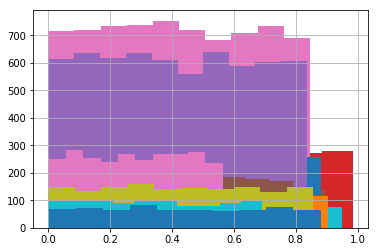

In [78]:
data.groupby('City').Ranking.hist()

Продолжая тему городов, неплохо бы использовать ее для получения дополнительных данных. На мой взгляд, очень хороший показатель - рейтинг городов по уровню жизни. В популярном рейтинге 200+ городов мира от Mercer, правда, нет пары городов из нашего списка. Но их рейтинг довольно легко апроксимируется на основе рейтинга других городов из тех же стран путем сопоставления ключевой информации. Рейтинг я сохранил в виде таблицы, дополнил недостающим и загрузил на Kaggle. 


In [79]:
q_rating = pd.read_csv('/kaggle/input/city-rating-by-quality-of-life/rating.csv', sep=';')
q_rating

data = data.merge(q_rating, on='City', how='left')

Также представляется перспективным параметром - особенно в разрезе предполгаемой практической цели - процент "пятизвездочников" в городах. Потому что местный уровень жизни не обязательно транслируется интересную для приезжих кухню. 

In [80]:
five_share = data[(data['Rating'] == 5)].groupby('City').Rating.count() / data.groupby('City').Rating.count() 
five_share = five_share.to_frame().reset_index(level=0)
five_share.columns = ['City','5_star_prc']
data = data.merge(five_share, on='City', how='left')

Ну, и закрывая тему городов, "закодируем" их. 

In [81]:
data = pd.get_dummies(data, columns=['City'])

У нас имеется признак ценового диапазона. В нем много пропусков, логично заполнить его средней ценовой категорией. После чего перевести в простой числовой аналог. 

In [82]:
data['Price Range'].fillna('$$ - $$$', inplace=True)
def convert_range (range):
    if range == '$':
        return 1
    if range == '$$$$':
        return 4
    return 2.5
data['Price Range'] = data['Price Range'].apply(convert_range)

Еще один признак с большим количеством пропусков - Number of Reviews. Заполняем нулями, и используем его, как он есть.

In [83]:
data['Number of Reviews'].fillna(0, inplace=True)

Данные о специализации ресторанов также имеют много пропусков. Вообще говоря, это не очень четкая классификация, есть пересечение категорий или не очень внятные категории. А беглое знакомство с сайтом показывает, что сами рестораны, регистрируясь на сайте, стараются поставить как можно больше тегов, хотя бы и пересекающихся. Поэтому любая логика заполнения будет достаточно условной. Поэтому заполним пропуски как Generic (с поправкой на формат колонки, чтобы было проще работать). В силу формата данных в колонке впрямую библиотечный метод get_dummies неприменим, проведем то же самое вручную, для чего нам потребуется вычленить список уникальных значений. Создав новые признаки, создадим на их основе еще один перспективный - разнообразие кухни.

In [84]:
data['Cuisine Style'].fillna("['Generic']", inplace=True)
cuisines_list = data['Cuisine Style'].str[2:-2].str.split("', '").explode().unique()

for cuisine in cuisines_list:
    data[cuisine] = data['Cuisine Style'].str.contains(cuisine).astype(int)  

data['Variety'] = data[cuisines_list].sum(axis=1)

## Окончательная сборка данных.

In [85]:
ml_data = data.drop(columns=['Restaurant_id', 'Cuisine Style', 'Reviews',  'URL_TA', 'ID_TA'])

# Теперь выделим тестовую часть
train_data = ml_data.query('sample == 1').drop(['sample'], axis=1)
test_data = ml_data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [86]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [87]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 165), (40000, 165), (40000, 164), (32000, 164), (8000, 164))

# Проверка модели в деле


In [88]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [89]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [90]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [91]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20571437499999998


Неплохо, но у нас целевой параметр квантуется по 0.5. Не уверен в том, что округлять результат будет корректным, но...

In [92]:
y_pred = np.around(y_pred/0.5, decimals=0)*0.5
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1756875


...но так результат намного симпатичнее.

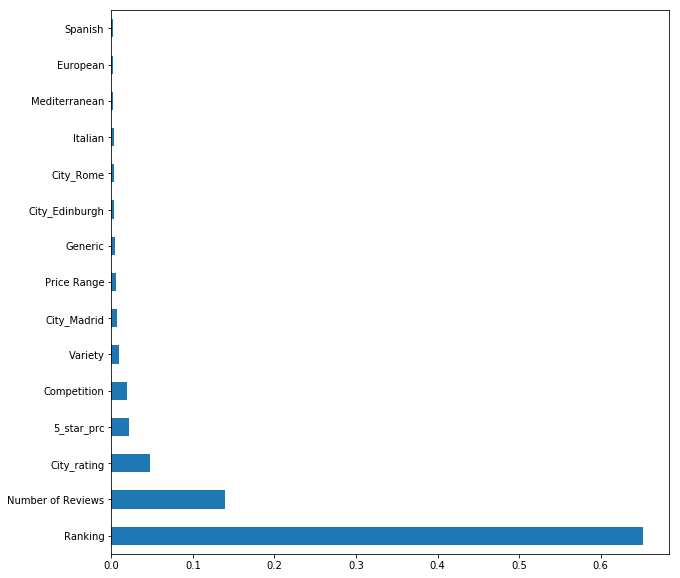

In [93]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Как можно видеть внешняя (по отношению к датасету) информация о количестве ресторанов в городе и качестве жизни оказалась весьма полезной с т.з. результата, войдя в топ-5 по значимости. Хотя, если отказаться от рейтинга городов и оставить только процент "пятизвездочников" - или же поступить наоборот -  итоговая метрика практически не меняется. *(Хотя влияет на плюс-минус место в рейтинге соревнований)* Если бы у нас была борьба за ресурсоемкость, можно было бы сэкономить признак. Количество обзоров, судя по всему, сильно взаимосвязано с популярностью заведения. И, разумеется, всего важнее оказался Ranking, ибо место среди конкурентов наверняка связано с рейтингом и, скорее всего, отражает неокругленный рейтинг в относительной шкале. В свете этого, не уверен, что смог помочь TripAdvisor, но в комплексе получился довольно разносторонний и поучительный проект.

# Submission


In [94]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Competition,City_rating,5_star_prc,City_Amsterdam,City_Athens,City_Barcelona,...,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,Variety
7573,0.144775,2.5,172.0,0.0,10948,46,0.057960,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3200,0.291368,1.0,152.0,0.0,16728,39,0.057138,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1200,0.529352,1.0,2.0,0.0,2947,76,0.107738,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3978,0.443894,2.5,3.0,0.0,1818,2,0.068613,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9293,0.681874,2.5,12.0,0.0,19442,41,0.079800,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1569,0.070242,2.5,226.0,0.0,16728,39,0.057138,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9594,0.370795,2.5,38.0,0.0,19442,41,0.079800,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7146,0.738889,2.5,2.0,0.0,3060,3,0.076856,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7136,0.357652,2.5,321.0,0.0,2947,76,0.107738,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2505,0.486571,2.5,6.0,0.0,3202,19,0.078415,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
test_data = test_data.drop(['Rating'], axis=1)

In [96]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [97]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [98]:
predict_submission

array([3.115, 4.12 , 4.445, ..., 3.165, 4.46 , 4.305])

In [99]:
sample_submission['Rating'] = np.around(predict_submission/0.5, decimals=0)*0.5
sample_submission.to_csv('submission_2.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,3.0
8,id_8,4.5
9,id_9,4.5
